In [2]:
import pandas as pd 
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score



from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer


In [3]:
pr = pd.read_csv('titanic.csv',usecols=['Age','Survived','Fare'])
pr.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
#for check if any column has null value
pr.isnull().sum()

#this code fill the null value by replacing it with mean value
pr.fillna(pr['Age'].mean(),inplace=True)


In [5]:
# x is input data and y is output data for trainin 
x = pr.iloc[:,1:3]
y = pr.iloc[:,0]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)

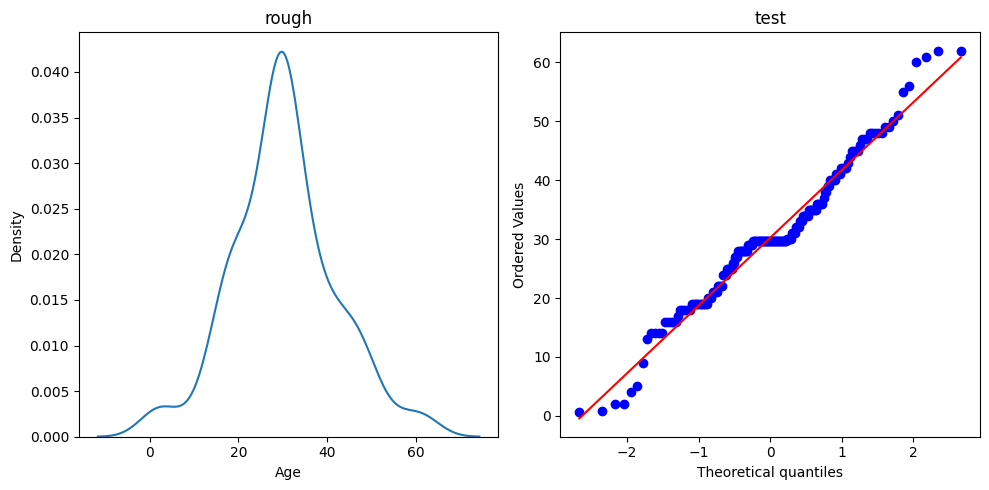

In [7]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1) 
sns.kdeplot(x_train['Age'])
plt.title('rough')

plt.subplot(1,2,2) 
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('test')
plt.tight_layout() #for neat layout

plt.show()


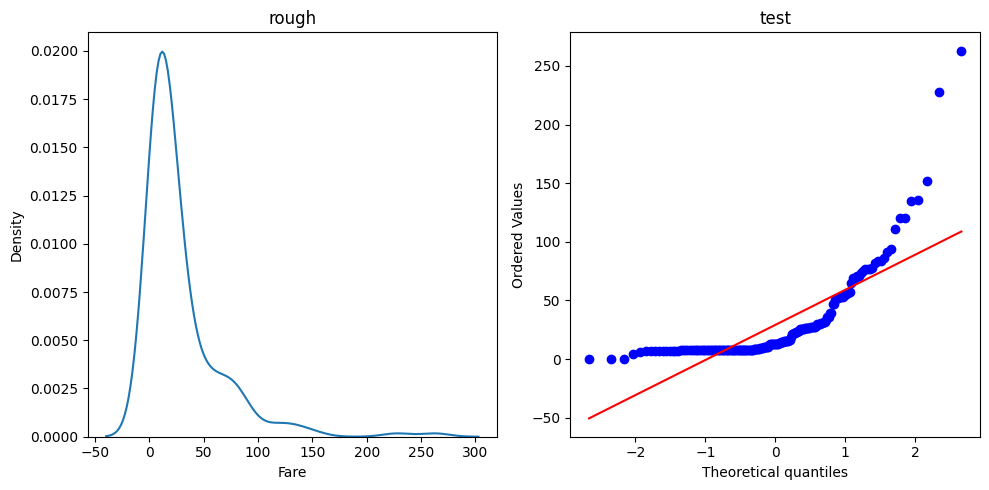

In [43]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1) 
#sns.histplot(x_train['Fare'])
sns.kdeplot(x_train['Fare'])
plt.title('rough')

plt.subplot(1,2,2) 
stats.probplot(x_train['Fare'],dist='norm',plot=plt)
plt.title('test')
plt.tight_layout() #for neat layout

plt.show()


In [48]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("result clf" ,accuracy_score(y_test,y_pred))

print("result clf2" ,accuracy_score(y_test,y_pred1))

result clf 0.6619915848527349
result clf2 0.6185133239831697


In [50]:
trf = FunctionTransformer(func=np.log1p)

In [51]:
x_train_transform = trf.fit_transform(x_train)
x_test_transform = trf.fit_transform(x_test)

In [53]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transform,y_train)
clf2.fit(x_train_transform,y_train)

y_pred = clf.predict(x_test_transform)
y_pred1 = clf2.predict(x_test_transform)

print("result clf" ,accuracy_score(y_test,y_pred))

print("result clf2" ,accuracy_score(y_test,y_pred1))

result clf 0.6746143057503506
result clf2 0.6213183730715287


In [69]:
x_transform = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("lr",np.mean(cross_val_score(clf,x_transform,y,scoring='accuracy',cv=10)))
      
print("dt",np.mean(cross_val_score(clf2,x_transform,y,scoring='accuracy',cv=10)))

lr 0.678027465667915
dt 0.6644694132334582


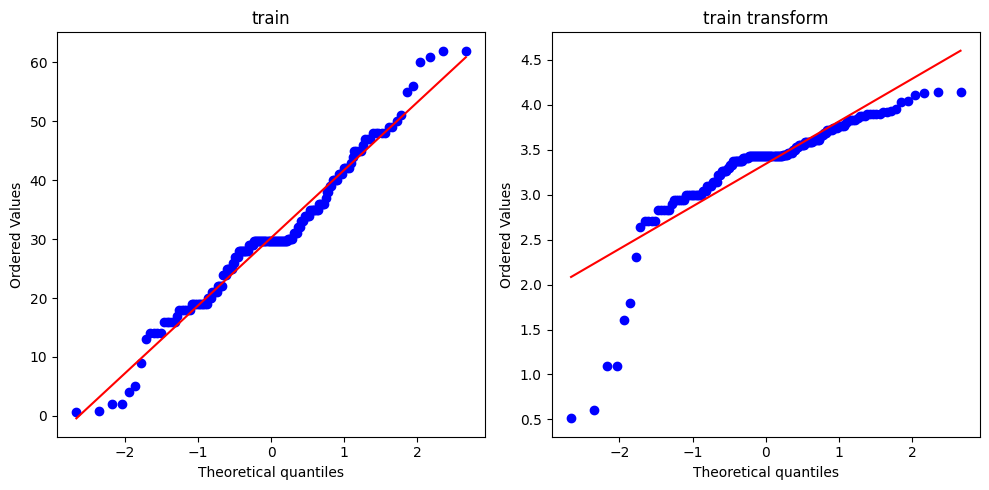

In [72]:
#before and after of tranform

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1) 
#sns.histplot(x_train['Fare'])
stats.probplot(x_train['Age'],dist='norm',plot=plt)
plt.title('train')

plt.subplot(1,2,2) 
stats.probplot(x_train_transform['Age'],dist='norm',plot=plt)
plt.title('train transform')
plt.tight_layout() #for neat layout

plt.show()


In [82]:
#funtion for transformation

def apply_transform(transform):
    x = pr.iloc[:,1:3]
    y = pr.iloc[:,0]

    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

    x_trans = trf.fit_transform(x)

    clf = LogisticRegression()

    print("accurary",np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))

    #before and after of tranform

    plt.figure(figsize=(10, 5))

    plt.subplot(1,2,1) 
    #sns.histplot(x_train['Fare'])
    stats.probplot(x['Fare'],dist='norm',plot=plt)
    plt.title('before')

    plt.subplot(1,2,2) 
    stats.probplot(x_trans[:,0],dist='norm',plot=plt)
    plt.title('after')
    plt.tight_layout() #for neat layout

    plt.show()



accurary 0.6195131086142323


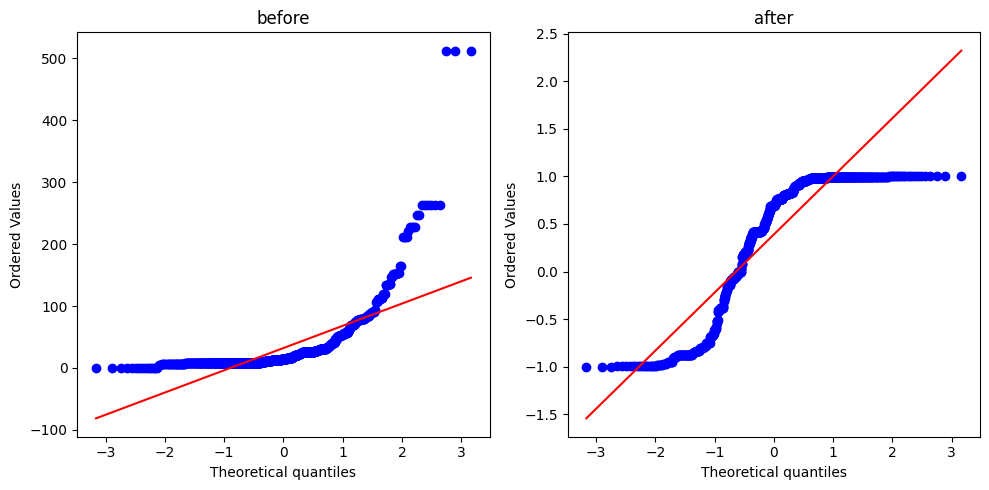

In [96]:
apply_transform(np.sin)